In [6]:
import wget
#download an example pdb file
filename = './1eei (1).pdb'
url = 'https://files.rcsb.org/download/1EEI.pdb'
#filename = wget.download(url)
datadir = '../../datasets/foldtree2/'

In [7]:

import foldtree2_ecddcd as ft2

converter = ft2.PDB2PyG()


In [8]:
from Bio import PDB
import warnings
from matplotlib import pyplot as plt
import numpy as np
import pydssp
from Bio.PDB import PDBParser   
import numpy as np

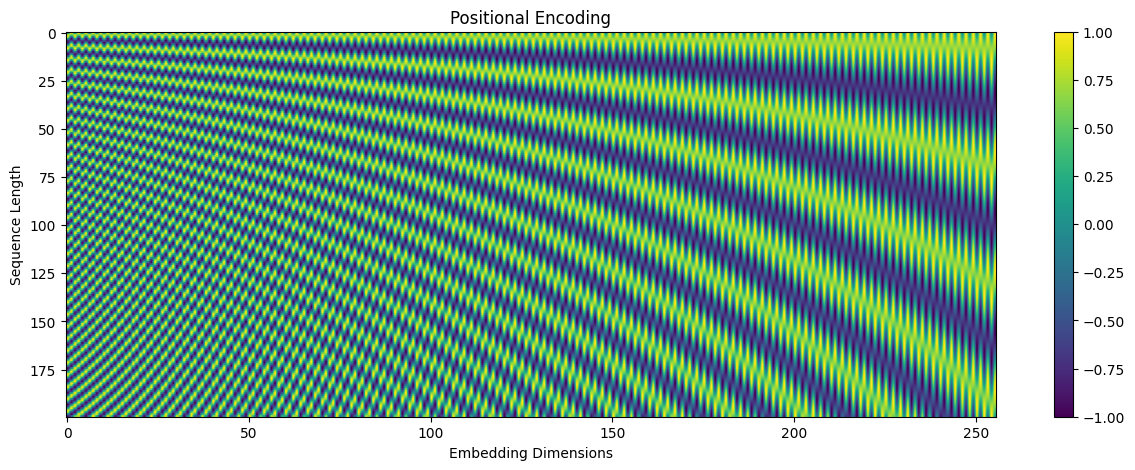

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# Example usage:
seq_len = 200  # Length of the sequence
d_model = 256  # Dimension of the embeddings

positional_encoding = converter.get_positional_encoding( seq_len , d_model)

# Plotting the positional encoding for visualization
plt.figure(figsize=(15, 5))
plt.imshow(positional_encoding, aspect='auto', cmap='viridis')
plt.colorbar()
plt.xlabel('Embedding Dimensions')
plt.ylabel('Sequence Length')
plt.title('Positional Encoding')
plt.show()

     0     1     2     3     4     5     6      7      8      9   ...   10  \
A  4.35  0.61  1.18  1.56  1.00  0.77  0.37  0.357   52.6   16.0  ...  0.0   
R  4.38  0.60  0.20  0.45  0.52  0.72  0.84  0.529  109.1  -70.0  ...  0.0   
N  4.75  0.06  0.23  0.27  0.35  0.55  0.97  0.463   75.7  -74.0  ...  0.0   
D  4.76  0.46  0.05  0.14  0.44  0.65  0.97  0.511   68.4  -78.0  ...  0.0   
C  4.65  1.07  1.89  1.23  0.06  0.65  0.84  0.346   68.3  168.0  ...  0.0   
Q  4.37  0.00  0.72  0.51  0.44  0.72  0.64  0.493   89.7  -73.0  ...  0.0   
E  4.29  0.47  0.11  0.23  0.73  0.55  0.53  0.497   84.7 -106.0  ...  0.0   
G  3.97  0.07  0.49  0.62  0.35  0.65  0.97  0.544   36.3  -13.0  ...  0.0   
H  4.63  0.61  0.31  0.29  0.60  0.83  0.75  0.323   91.9   50.0  ...  0.0   
I  3.95  2.22  1.45  1.67  0.73  0.98  0.37  0.462  102.0  151.0  ...  0.0   
L  4.17  1.53  3.23  2.93  1.00  0.83  0.53  0.365  102.0  145.0  ...  1.0   
K  4.36  1.15  0.06  0.15  0.60  0.55  0.75  0.466  105.1 -141.0

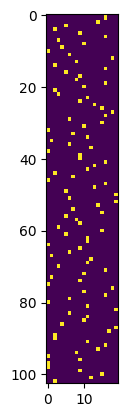

contacts (103, 103)


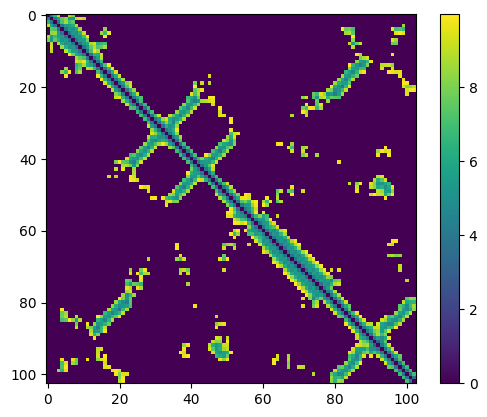

torch.Size([1, 103, 4, 3])
hbond (103, 103)


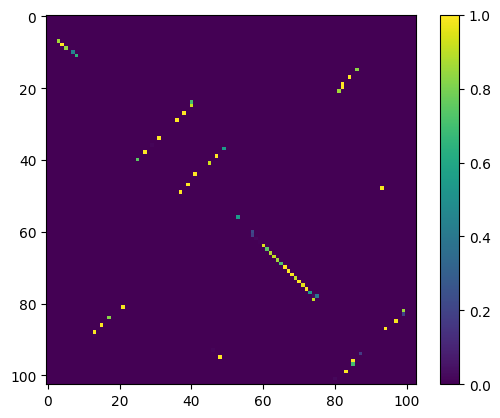

positions (103, 256)


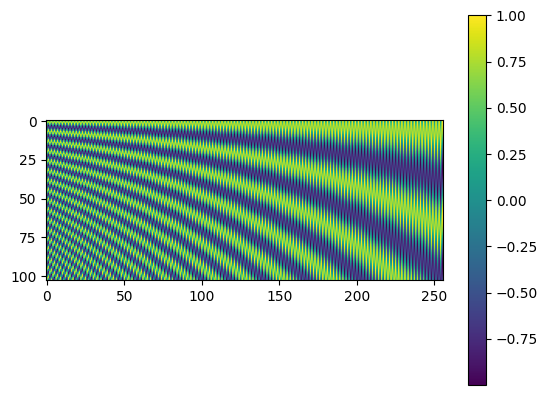

vals (103, 844)


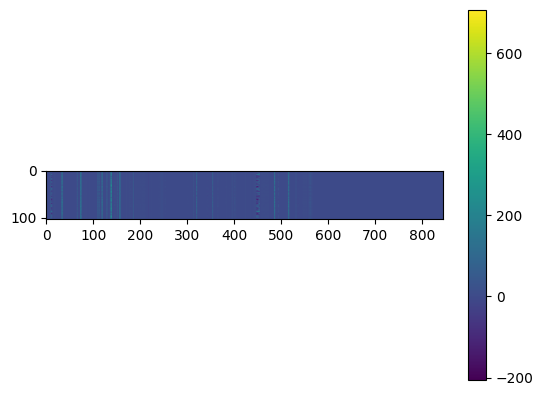

plddt (103, 1)


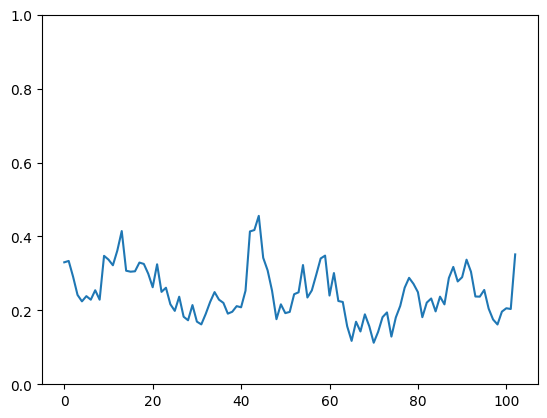

In [11]:
filename = './1eei.pdb'

angles, contact_points, blank , hbond_mat, backbone , backbone_rev , positional_encoding , plddt ,aa = converter.create_features(filename, distance = 10, verbose = True)


In [12]:
print(angles.shape)
print( 'one hot aa' , angles.iloc[:,-20:] ) 

(103, 845)
one hot aa           236       237       238       239       240       241       242  \
0    0.000000  1.000000  0.000000  1.000000  0.000000  1.000000  0.000000   
1    0.119423  0.992843  0.117304  0.993096  0.115222  0.993340  0.113176   
2    0.237136  0.971476  0.232988  0.972480  0.228909  0.973448  0.224899   
3    0.351456  0.936205  0.345454  0.938436  0.339546  0.940589  0.333731   
4    0.460745  0.887533  0.453151  0.891434  0.445661  0.895202  0.438274   
..        ...       ...       ...       ...       ...       ...       ...   
98  -0.741254  0.671224 -0.864466  0.502692 -0.948829  0.315790 -0.992865   
99  -0.655790  0.754943 -0.799530  0.600626 -0.906124  0.423013 -0.972990   
100 -0.560940  0.827857 -0.723554  0.690267 -0.851349  0.524600 -0.940611   
101 -0.458060  0.888921 -0.637588  0.770377 -0.785233  0.619200 -0.896146   
102 -0.348625  0.937262 -0.542818  0.839850 -0.708658  0.705552 -0.840165   

          243       244       245       246       247

In [13]:
import pandas as pd
datadir = '../../datasets/foldtree2/'

cols = 'repId_isDark_nMem_repLen_avgLen_repPlddt_avgPlddt_LCAtaxId'.split('_')
repdf = pd.read_table(datadir+ './afdbclusters/2-repId_isDark_nMem_repLen_avgLen_repPlddt_avgPlddt_LCAtaxId.tsv')
repdf.columns = cols
print(repdf.head())

        repId  isDark  nMem  repLen   avgLen  repPlddt  avgPlddt  LCAtaxId
0  A0A6M1CKG1       0     3     122  122.667     96.06   88.1467     91347
1  A0A4Q3Q6P1       1     3     117  113.333     71.94   67.8333     80864
2  A0A4V3EFQ4       0     3     153  156.000     68.56   58.8533    131567
3  A0A4V3EKB1       1     3      51   51.000     62.62   62.7700      1883
4  A0A4V3EP89       0     2      96   94.500     70.88   72.1900   2593676


In [14]:
import multiprocessing as mp
import tqdm
import os
import numpy as np
import wget 

def download_pdb(rep ,structdir = datadir+'structs/'):
    url = f'https://alphafold.ebi.ac.uk/files/AF-{rep}-F1-model_v4.pdb'
    #check if file exists
    if os.path.exists( structdir + rep + '.pdb'):
        return structdir + rep + '.pdb'
    filename = wget.download(url, out=structdir + rep + '.pdb')
    return filename

def download(repdf , nreps = 100 , structdir = datadir +'structs/'):
    if not os.path.exists(structdir):
        os.makedirs(structdir)
    reps = repdf.repId.unique()
    if nreps:
        #select a random sample of representatives
        reps = np.random.choice(reps, nreps)
    with mp.Pool(20) as p:
        filenames = p.map(download_pdb, tqdm.tqdm(reps))
        return filenames

In [15]:
#download(repdf, nreps = 1000 , structdir = '../datasets/foldtree2/structs/' )

In [16]:
import torch

AVAIL_GPUS = min(1, torch.cuda.device_count())
BATCH_SIZE = 256 if AVAIL_GPUS else 64
# Path to the folder where the datasets are/should be downloaded
DATASET_PATH = os.environ.get("PATH_DATASETS", "data/")
# Path to the folder where the pretrained models are saved
CHECKPOINT_PATH = os.environ.get("PATH_CHECKPOINT", "saved_models/GNNs/")

#create the h5 dataset from the pdb files
import glob
import h5py

# Setting the seed for everything
torch.manual_seed(0)
np.random.seed(0)


# Ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [17]:
data_sample =converter.struct2pyg( filename, verbose=True)
print(data_sample)
ndim = data_sample['res'].x.shape[1]


HeteroData(
  identifier='1eei',
  AA={ x=[103, 20] },
  plddt={ x=[103, 1] },
  positions={ x=[103, 256] },
  res={ x=[103, 844] },
  (res, backbone, res)={
    edge_attr=[102],
    edge_index=[2, 307],
  },
  (res, backbonerev, res)={
    edge_attr=[102],
    edge_index=[2, 205],
  },
  (res, contactPoints, res)={
    edge_attr=[928],
    edge_index=[2, 928],
  },
  (res, hbond, res)={
    edge_attr=[64],
    edge_index=[2, 64],
  }
)


In [18]:

#pdbfiles_structalign = glob.glob(datadir + 'struct_align/*/structs/*.pdb')


KeyboardInterrupt: 

In [19]:
import glob
datadir = '../../datasets/foldtree2/'

In [20]:
import  foldtree2_ecddcd as ft2
converter = ft2.PDB2PyG()

In [21]:
#pdbfiles = glob.glob(datadir + 'structs/*.pdb')
#converter.store_pyg(pdbfiles_structalign, filename='structs_structalign_new.h5', verbose = False)

In [22]:
#pdbfiles = glob.glob(datadir+'structs/*.pdb')
#converter.store_pyg(pdbfiles, filename='structs_training.h5', verbose = False)

In [23]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import VGAE
from torch.optim import Adam
from torch_geometric.data import DataLoader
import pickle

# Create a DataLoader for training
total_loss_x = 0
total_loss_edge = 0
total_vq=0
total_kl = 0
total_plddt=0
# Training loop

In [34]:
#load model if it exists
#add positional encoder channels to input
encoder = ft2.HeteroGAE_Encoder(in_channels=ndim, hidden_channels=[ 400 ]*3 , out_channels=250, metadata=converter.metadata , num_embeddings=248, commitment_cost=1 , encoder_hidden=500 , EMA = True )
#encoder = HeteroGAE_VariationalQuantizedEncoder(in_channels=ndim, hidden_channels=[100]*3 , out_channels=25, metadata=metadata , num_embeddings=256  , commitment_cost= 1.5 )

decoder = ft2.HeteroGAE_Decoder(encoder_out_channels = encoder.out_channels , 
                            hidden_channels={ ( 'res','backbone','res'):[ 500 ] * 5  } , 
                            out_channels_hidden= 150 , metadata=converter.metadata , amino_mapper = converter.aaindex , Xdecoder_hidden=100 )

encoder_save = 'encoder_mk2_aa_EMA_248'
decoder_save = 'decoder_mk2_aa_EMA_248'
overwrite = False

if os.path.exists(encoder_save) and overwrite == False:
    encoder.load_state_dict(torch.load(encoder_save ))
if os.path.exists(decoder_save) and overwrite == False:
    decoder.load_state_dict(torch.load(decoder_save  ))


#create a training loop for the GAE model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#device = torch.device( 'cpu')
print(device)


train_loop = True
V_train_loop = False

betafactor = 2
#put encoder and decoder on the device
encoder = encoder.to(device)
decoder = decoder.to(device)


Seed set to 42
Seed set to 42


cuda


In [35]:
#use autoreload

import importlib
importlib.reload(ft2)

struct_dat = ft2.StructureDataset('structs_training.h5')

In [36]:
if train_loop == True:
    train_loader = DataLoader(struct_dat, batch_size=40, shuffle=True)
    optimizer = torch.optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=0.001)
    encoder.train()
    decoder.train()
    
    xlosses = []
    edgelosses = []
    vqlosses = []
    plddtlosses = []

    edgeweight = 2
    xweight = 2
    vqweight = 1
    plddtweight = 1

    for epoch in range(1000):
        for data in tqdm.tqdm(train_loader):
            data = data.to(device)
            optimizer.zero_grad()
            z,vqloss = encoder.forward(data['res'].x, data['AA'].x , data.edge_index_dict)
            
            #add positional encoding to give to the decoder
            edgeloss = ft2.recon_loss(z , data.edge_index_dict[( 'res','contactPoints','res')]
                                  , data.edge_index_dict[( 'res','backbone','res')], decoder)
            
            recon_x , edge_probs = decoder(z, data.edge_index_dict[( 'res','contactPoints','res')] , data.edge_index_dict )        
    
            xloss = ft2.aa_reconstruction_loss(data['AA'].x, recon_x)
            #plddtloss = x_reconstruction_loss(data['plddt'].x, recon_plddt)
            loss = xweight*xloss + edgeweight*edgeloss + vqweight*vqloss #+ plddtloss
            loss.backward()
            optimizer.step()
            total_loss_edge += edgeloss.item()
            total_loss_x += xloss.item()
            total_vq += vqloss.item()
            #total_plddt += plddtloss.item()

        if epoch % 100 == 0 :
            #save model
            torch.save(encoder.state_dict(), encoder_save)
            torch.save(decoder.state_dict(), decoder_save)
        """
        for loss in [( total_loss_x , xlosses , xweight ), (total_loss_edge, edgelosses, edgeweight), ( total_vq, vqlosses, vqweight ) ]:
            loss[1].append(loss[0])
            #calculate the mean delta loss for past 10 epochs
            if len(loss[1]) > 10:
                loss[1].pop(0)
                mean_loss = np.mean(loss[0:5])
                #calculate the delta loss for the last 5 epochs
                delta_loss = np.mean(loss[1][-5:])
                delta_loss = delta_loss- mean_loss
                if delta_loss > 0:
                    loss[2] = loss[2]*2
                else:
                    loss[2] = loss[2]/1.5
                loss[2] = np.clip(loss[2], 1e-5, 1e5)
        """    
        print(f'Epoch {epoch}, AALoss: {total_loss_x:.4f}, Edge Loss: {total_loss_edge:.4f}, vq Loss: {total_vq:.4f}') #, plddt Loss: {total_plddt:.4f}')
        total_loss_x = 0
        total_loss_edge = 0
        total_vq = 0
        #total_plddt = 0
    torch.save(encoder.state_dict(), encoder_save)
    torch.save(decoder.state_dict(), decoder_save)

  0%|                                                                                         | 0/93 [00:00<?, ?it/s]


RecursionError: maximum recursion depth exceeded while calling a Python object

In [102]:
#load encoder and decoder
encoder.load_state_dict(torch.load(encoder_save))
decoder.load_state_dict(torch.load(decoder_save))

#move encoder and decoder to device
encoder = encoder.to(device)
decoder = decoder.to(device)


In [103]:
#predict the embeddings for a structure
def predict_structure(structure, encoder, decoder):
    encoder.eval()
    decoder.eval()
    data = converter.struct2pyg(structure)
    data = data.to(device)
    z,qloss = encoder.forward(data['res'].x , data['AA'].x,  data.edge_index_dict)
    #create all vs all edge index
    edge_index = torch.tensor( [ [i,j] for i in range(z.shape[0]) for j in range(z.shape[0]) ] ).T
    #z = torch.cat([ data['positions'].x , z] , axis = 1)
    recon_x, edge_probs = decoder(z , edge_index , data.edge_index_dict )
    return z, recon_x, edge_probs , data

In [104]:
from matplotlib import pyplot as plt
from Bio.PDB import PDBParser
from Bio import PDB

def plot_embeddings(filename, encoder, decoder):
    z, recon_x, edge_probs,data = predict_structure(filename, encoder, decoder)
    z = z.detach().cpu().numpy()
    edge_probs = edge_probs.detach().cpu().numpy()
    print(edge_probs.shape)
    #reshape the edge probabilities into a matrix
    edge_probs = edge_probs.reshape((z.shape[0], z.shape[0]))
    print(edge_probs.shape)
    print(edge_probs)
    #get edge index for the structure
    #plot the edge probabilities
    plt.figure(figsize=(10,10))
    plt.title('Edge Probabilities ' + filename)
    plt.imshow(1-edge_probs)
    plt.colorbar()
    plt.show()


    plt.figure(figsize=(10,10))
    plt.title('log Edge Probabilities ' + filename)
    plt.imshow( np.log( 1-edge_probs ))
    plt.colorbar()
    plt.show()

    #plot the distance matrix
    chain = converter.read_pdb(filename)[0]
    chain = [ r for r in chain if PDB.is_aa(r)]
    distances = np.zeros((len(chain), len(chain)))
    for i in range(len(chain)):
        for j in range(len(chain)):
            distances[i,j] = chain[i]['CA'] - chain[j]['CA']
    plt.figure(figsize=(10,10))
    plt.title('distmat ' + filename)

    plt.imshow(distances)
    plt.colorbar()

    distances[distances>10] = 0
    plt.figure(figsize=(10,10))
    plt.title('contactmat ' + filename)

    plt.imshow(distances)
    plt.colorbar()
    #transform the embeddings to the quantized string
    encoded_string = encoder.vector_quantizer.discretize_z(torch.tensor(z).to(device))
    print('encoded', encoded_string)
    plt.show()
    
    plt.imshow(recon_x.detach().cpu().numpy())
    plt.colorbar()
    plt.show()

    plt.imshow(data['AA'].x.detach().cpu().numpy())
    plt.colorbar()
    plt.show()


(10609,)
(103, 103)
[[0.996064   0.9953792  0.99507624 ... 0.9871723  0.9890037  0.98846614]
 [0.9953792  0.9949114  0.9945709  ... 0.9883937  0.9903499  0.98971844]
 [0.99507624 0.9945709  0.9944259  ... 0.98581934 0.98827016 0.9872348 ]
 ...
 [0.9871723  0.9883937  0.98581934 ... 0.99469596 0.9952253  0.9954921 ]
 [0.9890037  0.9903499  0.98827016 ... 0.9952253  0.996503   0.99618703]
 [0.98846614 0.98971844 0.9872348  ... 0.9954921  0.99618703 0.99629384]]


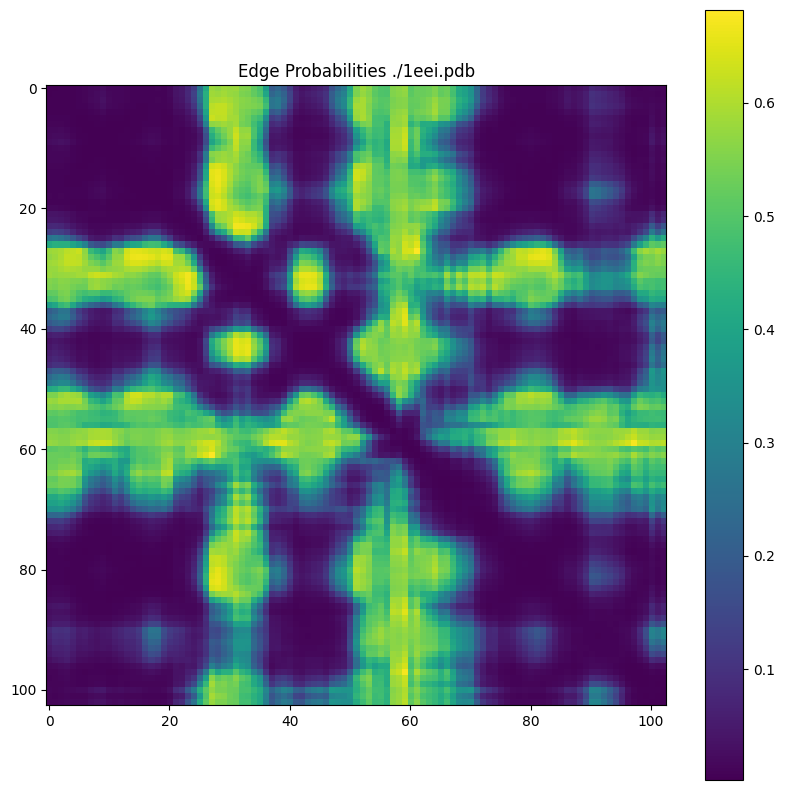

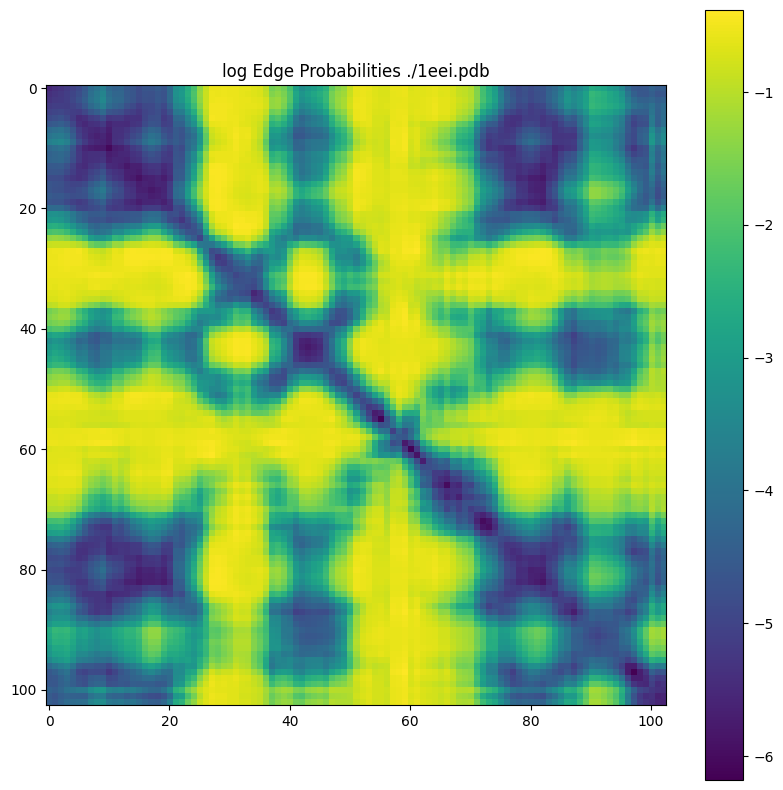

encoded (tensor([234, 234, 219, 165,  60, 191, 234,  84, 240,  95, 211, 247, 179,  61,
         90, 234, 165, 191,  61, 234, 240,  90,  84,  94, 191,  68, 167, 179,
         64,  56, 111, 122, 211, 185,  94, 182,  56, 171, 211, 191, 191, 234,
         68,  94,  60,  23, 211, 234,  68, 227, 121,  56, 121, 219, 185, 125,
        137, 130, 201,  83, 160, 227, 223, 223, 211, 191,  56,  17, 171, 223,
         83,  62, 240,  17, 191, 211, 179, 240, 234,  78, 211, 139, 121,  78,
        139, 240,  95, 121,   8,  60,  60,  94, 234, 138,  61, 211, 191, 211,
        211, 191, 158, 171,  90], device='cuda:0'), ['ê', 'ê', 'Û', '¥', '<', '¿', 'ê', 'T', 'ð', '_', 'Ó', '÷', '³', '=', 'Z', 'ê', '¥', '¿', '=', 'ê', 'ð', 'Z', 'T', '^', '¿', 'D', '§', '³', '@', '8', 'o', 'z', 'Ó', '¹', '^', '¶', '8', '«', 'Ó', '¿', '¿', 'ê', 'D', '^', '<', '\x17', 'Ó', 'ê', 'D', 'ã', 'y', '8', 'y', 'Û', '¹', '}', '\x89', '\x82', 'É', 'S', '\xa0', 'ã', 'ß', 'ß', 'Ó', '¿', '8', '\x11', '«', 'ß', 'S', '>', 'ð', '\x11', '¿',

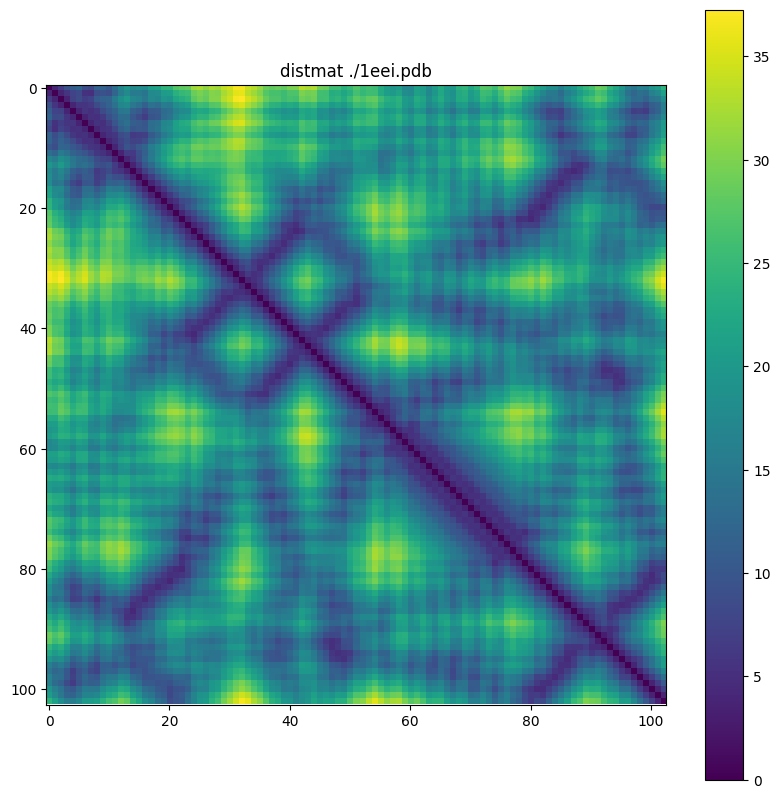

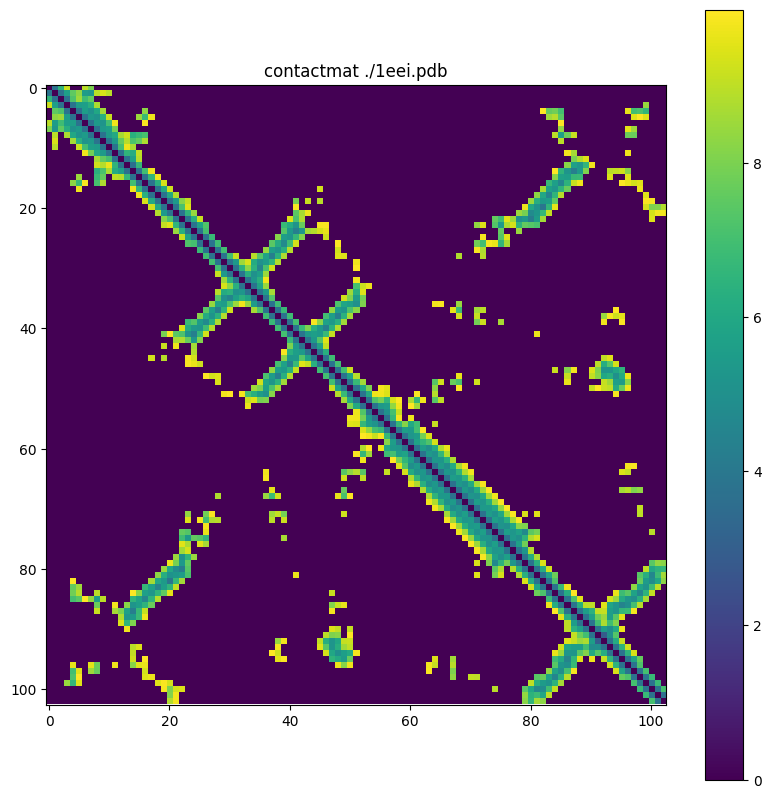

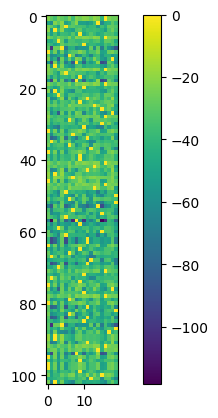

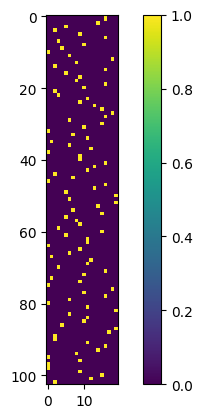

In [105]:
plot_embeddings(filename, encoder, decoder)


In [108]:
#add the encoded structures to the struct align hdf5

import time
import glob
import h5py
datadir = '../../datasets/foldtree2/'
pdbfiles_structalign = glob.glob(datadir + 'struct_align/*/structs/*.pdb')


In [109]:
print( len(pdbfiles_structalign) )

9390


In [ ]:
#use autoreload
#alndbmk2 = converter.store_pyg( pdbfiles_structalign, filename='structalignmk2.h5', verbose = False )

In [107]:

encoder.encode_structures_fasta( loader , 'aln_encoded.fasta')

7836it [1:01:35,  2.12it/s]


'aln_encoded.fasta'

In [84]:
loader = dataloader(pdbfiles_structalign[0:10])
encoder.encode_structures_fasta( loader , 'aln_encoded_test.fasta' )

with open('aln_encoded_test.fasta') as f:
    print(f.read())

10it [00:02,  4.49it/s]


>A0A0B0EGE4
«Ëy<<Ûf¿^^¿÷¿>ÓoTÓyÓ³¤¤<<ß¶ßß¤é÷¤÷÷^D§>>¿¿¿<¿¿¥^>÷y>><_>T§÷<¿y

>A0A6M1Q9D4
¿¿¤÷÷ã<÷^y>¤_y=Û`¿÷y`¿ß§¹¤§ß¤DDß`¹¿^y^ÓyÛ§³Dð@÷D=DD<Ó^T÷÷¿ð

>A0A7W6LMN5
ËË^.óÛ¹Ó¶D¶³³yo8¹^Û¹ ð«@8«ó^¾@@¾8@^Ü¤ßß.¶ßãDSS_Sß8ÚiãÛ¤Ug\zUóÜÃ66Ó¿y?¶_oDño÷ÓSÛð¶}.gógÄ0ÄÛÛ£.ïH6£U£.Ug#ÄSS	dgX|£.£ÜïWgg­0}£WÜ0 Z	ÛâdçÛÛïSÎ£dS££dÎÇçÛë0)ÎYë­£±ç£ÛcëÆd£Üpc~EE&ï­Ò­#SSUEUS 0Òç	SSY:)Î­ 	Ò 	çïïEÛYëcÒÛ&Î¬Î Q#&6 ­Ò
	Û	X¬Yp	Û¬QÈp¬£06:&Y¬ÎÎU#Îc~çEë0Ûç

>A0A090ZGQ5
ËËó¹.y¿}Ó÷^§ó^T_8§_y<¤^Ó¤ÓßÃÛfUÃ¶ß`88y_f`T8@¤^ßDy^ÃÃ¤|S²²|¹²ß¤ß÷÷¿ß|¤=Ú|T.¤ÛWXX.|¹#Ü=å¾Ä6#g|ÄÛ#|SßWåSß¤ð||	­WTXESY	OÛ	|	ÒS­X~ç	WÒY	:		X­²SSO	O||OçT	6|QXEW|OX¹SOE­çç	XWSY:OS#­OOW|YÈX­|:­E6|SOEX	¬XTO¹ÈTO	|5E	uçÛ	²YÛEçY~~	E¬|=:& ­­	O	¹#=Û5~­E::ÄYX

>A0A378RLJ5
ËËÛ§T§D=i§f¤>ß>ß`ßß¤T=} Â}ßÛDßSyDT@ß>§ß>TD¤÷¤TßDÃÉ| ¹÷ÛßyS÷ß¤ãßX=|åW­.ÛT|¤||.¹Ü#..÷ß.SS ßiÜ..åTW|T¤W|	­WET=OÛpO­?Û¹TST	E¹ÈO5ZÒO|	T=¥WYTQÒ|XXXXO	O²ÛET²OOOXNO²|EOYEX

In [ ]:

def draw_sample( mean , covar):
    #draw samples from the mean and covariance
    #operating under the assumption that its a multivariate gaussian
    return np.random.multivariate_normal(mean, covar)

def draw_nsamples( mean, covar , n):
    samples = [draw_sample(mean, covar) for i in range(n)]
    return np.vstack(samples)

#draw samples from the cluster centers for a given sequence of labels
def labels_cluster_samples( labels , mean , covar ):
    embed_sample = [ draw_sample(mean[labels[i]], covar[labels[i]]) for l in range(len(labels))]        print(idx)

    return embed_sample

def draw_n_label_samples(labels, mean, covar , n = 10):
    samplings = [ labels_cluster_samples( labels , mean , covar ) for i in range(n) ]
    return samplings

def decode_samples(samplings , decoder , retstack = False):
    #create all vs all edge index
    edge_index = torch.tensor( [ [i,j] for i in range(s.shape[0]) for j in range(s.shape[0]) ] ).T
    #create a backbone edge index
    backbone = torch.tensor( [i,j] for i in range( s.shape[0] ) for j in range(s.shape[0]) )
    backbone = backbone.to(device)
    print(edge_index)
    edge_index = edge_index.to(device)
    x_stack = []
    edge_stack= []
    for samples in samplings:
        s = torch.tensor(s)
        s = s.to(device)
        recon_x, edge_probs = decoder(s, edge_index , backbone ] )
        x_stack.append( recon_x)
        edge_stack.append( edge_probs)
    
    #get the mean and variance elementwise
    if retstack == True:
        return edge_stack , x_stack

    if retstack == False:
        x_stack = np.dstack(x_stack)
        edge_stack = np.dstack( edge_probs ) 

        edge_means = np.mean( edge_stack , axis = 2)
        edge_vars = np.var(edge_stack , axis = 2)

        x_means = np.mean(edge_stack , axis = 2)
        x_vars = np.var(edge_stack , axis = 2)

        return edge_means, edge_vars , x_means, x_vars


def decoded_to_seq(x_means , decode_dict):
    #transform a on hot matrix of AA probabilities to a sequence
    #get max index of each row
    indices = np.argmax( x_means , axis = 1 )
    seq = [ decode_dict[c] for c in list(indices)]
    return seq


def plot_edgestack(edge_means, edge_vars):
    #plot a scatterplot with the dot size representing the inverse of the variance 
    # and the color representing the contact proba
    
    #xy grid for scatterplot
    xv, yv = np.meshgrid(x = np.arrange( edge_means.shap[0]) , y = np.arrange(edge_means.shap[1]) = , indexing='ij')

    #colors with the means
    colors = edge_means.flatten()

    #dot size with the vars
    sizes = 1/edge_vars.flatten()
    plt.scatter( xv , yv , s = sizes , c = colors , cmap = 'viridis')
    plt.show()


def plot_logo(x_means, decode_dict):
    #plot an hmm type logo with the sequence reconstruction  
    seqdf = pd.DataFrame(x_means, columns = decode_dict.keys())
    #plot the logo
    logo = logomaker.Logo(seqdf, color_scheme='chemistry')
    return logo




SyntaxError: invalid syntax (1719190738.py, line 12)

: 

In [ ]:
"""
#not used for now but could be useful later

from prody import *
from pylab import *
import warnings
def anm_analysis(filename):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        prot = parsePDB( filename  , )
        calphas2 = prot.select('calpha')
        anm = ANM('ANM analysis')
        anm.buildHessian(calphas2)
        anm.calcModes()
        cov = anm.getCovariance()
        cov[ cov < 0] = -cov[ cov < 0]
        logcov = np.log(cov)
        #get the top .5% of the covariance matrix
        top = np.percentile(logcov, 99.5)
        logcov[ logcov < top] = 0
        
        
        return logcov

cov = anm_analysis(filename)
print(cov.shape)

plt.imshow(cov)
plt.colorbar()
plt.show()

#print the number of 0 entries
print( np.sum(cov != 0) /np.sum(cov == 0))
print( np.sum(cov != 0) )

"""

'\n#not used for now but could be useful later\n\nfrom prody import *\nfrom pylab import *\nimport warnings\ndef anm_analysis(filename):\n    with warnings.catch_warnings():\n        warnings.simplefilter("ignore")\n        prot = parsePDB( filename  , )\n        calphas2 = prot.select(\'calpha\')\n        anm = ANM(\'ANM analysis\')\n        anm.buildHessian(calphas2)\n        anm.calcModes()\n        cov = anm.getCovariance()\n        cov[ cov < 0] = -cov[ cov < 0]\n        logcov = np.log(cov)\n        #get the top .5% of the covariance matrix\n        top = np.percentile(logcov, 99.5)\n        logcov[ logcov < top] = 0\n        \n        \n        return logcov\n\ncov = anm_analysis(filename)\nprint(cov.shape)\n\nplt.imshow(cov)\nplt.colorbar()\nplt.show()\n\n#print the number of 0 entries\nprint( np.sum(cov != 0) /np.sum(cov == 0))\nprint( np.sum(cov != 0) )\n\n'

In [ ]:
"""
#use symbolic regression to find the relationship between the embeddings and the edge probabilities
#propose a folding mechanism
from pysr import pysr, best

#use symbolic regression to find the relationship between the embeddings and the edge probabilities
#use matrix multiplication and addition as the binary operators
#use the embeddings as the input variables

#minimum logfiles 
import logging
logging.basicConfig(level=logging.ERROR)


equations = pysr(dotprods, edge_probs_stack, niterations=10, binary_operators=['+', '*' ,'^' , '/' , '-' ], 
                unary_operators=[ 'log10' , 'sin' , 'relu' , 'cos' , 'abs' ]  , procs=20 , verbosity=0 , nrestarts=10)

print(best(equations))

#use the symbolic regression equation to predict the edge probabilities
import sympy
from sympy import symbols, Function
from sympy.parsing.sympy_parser import parse_expr

x, y = symbols('x y')
f = parse_expr(best(equations))
f = sympy.lambdify(x, f, 'numpy')
xvals = np.linspace(-10,10,100)
yvals = f(xvals)
plt.plot(xvals, yvals)
plt.show()

#plot the edge probabilities
plt.figure(figsize=(10,10))
plt.imshow(1-edge_probs)
plt.colorbar()
plt.show()

"""

: 

In [ ]:
"""#use the symbolic regression equation to predict the edge probabilities

edge_probs_pred = f(zvals)
print(edge_probs_pred.shape)
#plot the edge probabilities
plt.figure(figsize=(10,10))
plt.imshow(1-edge_probs_pred)
"""


: 

In [ ]:
"""
#make a networkx graph from the contact points
import networkx as nx
import matplotlib.pyplot as plt
import colour

def make_graph(contact_points):
    G = nx.Graph()
    G.add_nodes_from(range(contact_points.shape[0]))

    for i in range(contact_points.shape[0]):
        for j in range(contact_points.shape[1]):
            if contact_points[i,j] != 0:
                G.add_edge(i,j, weight = contact_points[i,j] / 2)
    return G

#plot the contact point graph
#make the edges thicker for smaller weights
#make the nodes colors from a column of the angles dataframe


red = colour.Color("red")
blue = colour.Color("blue")
crange = [ c.hex_l for c in list(red.range_to(blue, 101))]


#add a color column to the angles dataframe
angles['color'] = [ int(100*(a-angles[111].min())/angles[111].max()) for a in angles[111]]
angles['color'] = [ crange[a] for a in angles['color']]

print(angles)

G = make_graph(contact_points)
edges = G.edges()
weights = [ G[u][v]['weight'] for u,v in edges]
#change the color of the nodes
colors = [ angles.loc[u]['color'] for u in G.nodes() ]
#change the size of the nodes$
sizes = [ angles.loc[u][110] for u in G.nodes() ]
#keep sizes between 0 and 1000  
sizes = [ 1000* (s - min(sizes))/max(sizes)  for s in sizes]
print( colors)
print( sizes)
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)
#draw nodes with colors

#get amino acid sequence from structure

chain = read_pdb(filename)[0]
chain = [ r for r in chain if PDB.is_aa(r)]
seq = [ r.get_resname() for r in chain ]

#label nodes with sequence
labels = { i:aa for i,aa in enumerate(angles.single_letter_code)}

nx.draw_networkx_nodes(G, pos = pos, node_color = colors, node_size = sizes  )

#draw edges with weights
nx.draw_networkx_edges(G, pos = pos, width = weights , alpha = 0.25)
#draw labels
nx.draw_networkx_labels(G, pos = pos, labels = labels , font_color='whitesmoke')

"""

'\n#make a networkx graph from the contact points\nimport networkx as nx\nimport matplotlib.pyplot as plt\nimport colour\n\ndef make_graph(contact_points):\n    G = nx.Graph()\n    G.add_nodes_from(range(contact_points.shape[0]))\n\n    for i in range(contact_points.shape[0]):\n        for j in range(contact_points.shape[1]):\n            if contact_points[i,j] != 0:\n                G.add_edge(i,j, weight = contact_points[i,j] / 2)\n    return G\n\n#plot the contact point graph\n#make the edges thicker for smaller weights\n#make the nodes colors from a column of the angles dataframe\n\n\nred = colour.Color("red")\nblue = colour.Color("blue")\ncrange = [ c.hex_l for c in list(red.range_to(blue, 101))]\n\n\n#add a color column to the angles dataframe\nangles[\'color\'] = [ int(100*(a-angles[111].min())/angles[111].max()) for a in angles[111]]\nangles[\'color\'] = [ crange[a] for a in angles[\'color\']]\n\nprint(angles)\n\nG = make_graph(contact_points)\nedges = G.edges()\nweights = [ G[

In [ ]:
"""
import torch
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx
from torch_geometric.data import HeteroData
import networkx as nx
from torch_geometric.data import HeteroData

def remove_self_loops_edge_index(edge_index):
    mask = edge_index[0] != edge_index[1]
    return edge_index[:, mask]

def convert_hetero_to_networkx(hetero_data):
    G = nx.MultiDiGraph()  # Use MultiDiGraph to support multiple edge types
    # Add nodes with type as an attribute
    for node_type in hetero_data.node_types:
        for node_id in range(hetero_data[node_type].num_nodes):
            # Node identifier format: (node_type, node_id)
            G.add_node((node_type, node_id), node_type=node_type)
    # Add edges
    for edge_type in hetero_data.edge_types:
        src_type, _, dst_type = edge_type
        edge_indices = hetero_data[edge_type].edge_index
        edge_indices = remove_self_loops_edge_index(edge_indices)
        for i in range(edge_indices.shape[1]):  # Iterate through each edge
            src_id, dst_id = edge_indices[:, i].tolist()
            # Edge identifier format: ((src_type, src_id), (dst_type, dst_id))
            G.add_edge((src_type, src_id), (dst_type, dst_id), edge_type=edge_type)
    return G

def plot_hetero_graph_with_curved_edges(data):
    print(data)
    G = convert_hetero_to_networkx(data)
    print(G)
    pos = nx.spring_layout(G)  # General layout if no positions are provided

    # Calculate offset for curved edges to avoid overlap
    edge_count = {}
    for src, dst, key in G.edges(keys=True):
        edge_count[(src, dst)] = edge_count.get((src, dst), 0) + 1
    # Draw nodes
    plt.figure(figsize=(12, 12))
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=70)
    
    edge_type_colors = {}
    unique_edge_types = data.edge_types
    # Generate a color map from matplotlib, or use a predefined set of colors
    colors = plt.get_cmap('tab20')(range(len(unique_edge_types)))
    for i, edge_type in enumerate(unique_edge_types):
        edge_type_colors[edge_type] = colors[i]

    # Draw edges with curvature
    for (src, dst), count in edge_count.items():
        for i in range(count):
            edge_key = list(G[src][dst])[i]
            style = G[src][dst][edge_key]
            curvature = 0.1 * (i - count // 2)
            nx.draw_networkx_edges(
                G, pos, edgelist=[(src, dst)],
                connectionstyle=f'arc3, rad={curvature}',
                arrowstyle='-|>',
                edge_color = edge_type_colors.get(edge_type, 'black'),  # Default color is black
                width=style.get('weight', 1),
                alpha = .25
            )

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
    plt.title('Heterogeneous Graph with Curved Edges')
    plt.axis('off')  # Turn off the axis
    plt.show()

"""

"\nimport torch\nimport networkx as nx\nimport matplotlib.pyplot as plt\nfrom torch_geometric.utils import to_networkx\nfrom torch_geometric.data import HeteroData\nimport networkx as nx\nfrom torch_geometric.data import HeteroData\n\ndef remove_self_loops_edge_index(edge_index):\n    mask = edge_index[0] != edge_index[1]\n    return edge_index[:, mask]\n\ndef convert_hetero_to_networkx(hetero_data):\n    G = nx.MultiDiGraph()  # Use MultiDiGraph to support multiple edge types\n    # Add nodes with type as an attribute\n    for node_type in hetero_data.node_types:\n        for node_id in range(hetero_data[node_type].num_nodes):\n            # Node identifier format: (node_type, node_id)\n            G.add_node((node_type, node_id), node_type=node_type)\n    # Add edges\n    for edge_type in hetero_data.edge_types:\n        src_type, _, dst_type = edge_type\n        edge_indices = hetero_data[edge_type].edge_index\n        edge_indices = remove_self_loops_edge_index(edge_indices)\n     